In [272]:
!pip install plotly
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import plotly.express as px

from sklearn.ensemble import IsolationForest

In [273]:
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [274]:
df = pd.read_csv("Atrazine.csv")
df = df[df['location'] == 'Chai']
df["timestamp"] = pd.to_datetime(df['sample date'])

Text(0.5, 0, 'Time Period')

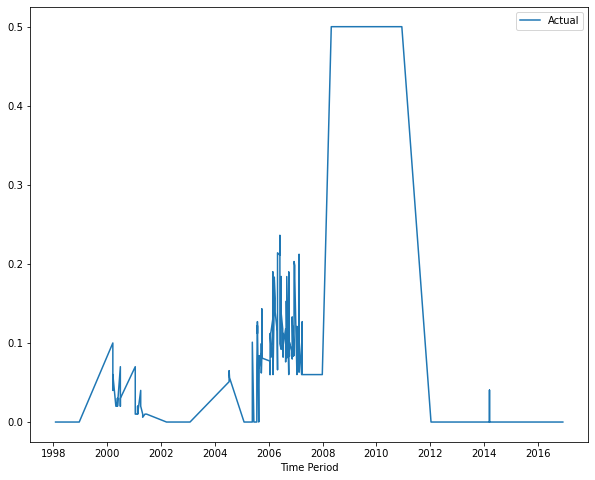

In [275]:
plt.plot(df['timestamp'], df['value'], markersize=8)  
plt.legend(['Actual', 'Anomaly Detected'])
plt.xlabel('Time Period')
# fig = px.line(df, x='timestamp', y='value', title='Atrazine')
# fig.show()

In [290]:
model = IsolationForest(contamination=0.1)
model.fit(df[['value']])
p = pd.Series(model.predict(df[['value']]))
df['outliers']=pd.Series(model.predict(df[['value']])).apply(lambda x: 'yes' if (x== -1) else 'no')
df.query("outliers=='yes'")

,id,value,location,sample date,measure,timestamp,outliers
43,5278,0.00,Chai,1998-06-28,Atrazine,1998-06-28,yes
44,5762,0.00,Chai,1998-06-28,Atrazine,1998-06-28,yes
53,5319,0.00,Chai,1998-07-23,Atrazine,1998-07-23,yes
54,5803,0.00,Chai,1998-07-23,Atrazine,1998-07-23,yes
55,6281,0.00,Chai,1998-07-23,Atrazine,1998-07-23,yes
62,5365,0.00,Chai,1998-08-23,Atrazine,1998-08-23,yes
63,5843,0.00,Chai,1998-08-23,Atrazine,1998-08-23,yes
64,6321,0.00,Chai,1998-08-23,Atrazine,1998-08-23,yes
149,104759,0.02,Chai,2000-04-28,Atrazine,2000-04-28,yes
164,104795,0.02,Chai,2000-05-19,Atrazine,2000-05-19,yes


In [280]:
df[:10]

,id,value,location,sample date,measure,timestamp,outliers
4,5080,0.0,Chai,1998-01-31,Atrazine,1998-01-31,no
5,5564,0.0,Chai,1998-01-31,Atrazine,1998-01-31,no
6,6042,0.0,Chai,1998-01-31,Atrazine,1998-01-31,no
8,5119,0.0,Chai,1998-02-20,Atrazine,1998-02-20,no
9,5603,0.0,Chai,1998-02-20,Atrazine,1998-02-20,no
10,6081,0.0,Chai,1998-02-20,Atrazine,1998-02-20,no
15,5158,0.0,Chai,1998-03-19,Atrazine,1998-03-19,no
16,5642,0.0,Chai,1998-03-19,Atrazine,1998-03-19,no
17,6120,0.0,Chai,1998-03-19,Atrazine,1998-03-19,no
24,5197,0.0,Chai,1998-04-17,Atrazine,1998-04-17,no


(array([15, 16, 18, 19, 20, 21, 22, 23, 39, 42, 43, 44, 48, 53, 54]),)

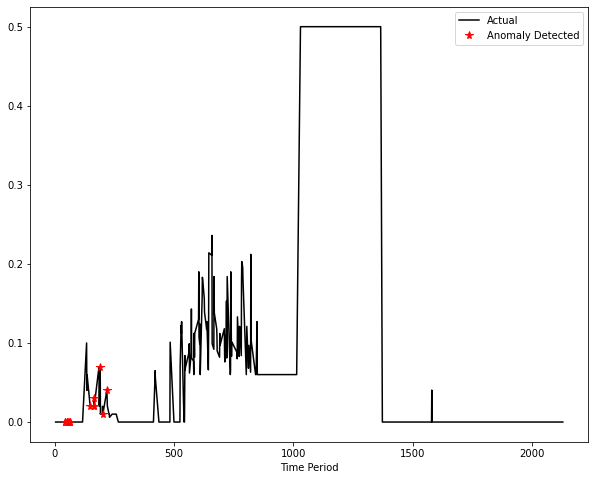

In [282]:
outlier_pos = np.where(df['outliers'] == 'yes')[0]
x = []; y = [];
for pos in outlier_pos:
    x.append(np.array(df['value'])[pos])
    y.append(df['value'].index[pos])
    
plt.plot(df['value'].loc[df['value'].index], 'k-')
plt.plot(y, x, 'r*', markersize=8)
plt.legend(['Actual', 'Anomaly Detected'])
plt.xlabel('Time Period')
